Project Brief
What’s the temperature in the Rovaniemi right now?

Your task for this project is to create a Python program that gets any city name as input and outputs the current temperature for that city.

Expected Output
When the program is executed, the terminal asks the user to enter a city. Once the user enters the city, the program outputs the temperature of that city as shown in the demo below.
https://substack-post-media.s3.amazonaws.com/public/images/faf0aa1b-7460-4ca6-b978-c8d3d1f317f1_958x171.png

👉 Pro tip: You can verify if the temperature generated by your program is the same as the temperature shown in this live webcam of the city of Rovaniemi in Finland.
https://youtu.be/Cp4RRAEgpeU

Environment Setup Instructions

Install the required libraries with:

`pip install requests`

Create a free account and get an API key from https://openweathermap.org


1. How to request data via One Call API 3.0
Full documentation for this API is available here. To call this API, you will need to use your API keys that you can find here.

Below is the format of API calls that you need to use.

API call to request current weather and forecast data:
https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&appid={API key}

API call to request historical data:
https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={time}&appid={API key}

API call to request history daily aggregation data:
https://api.openweathermap.org/data/3.0/onecall/day_summary?lat={lat}&lon={lon}&date={date}&appid={API key}

Example of an API call:
https://api.openweathermap.org/data/3.0/onecall?lat=33.44&lon=-94.04&appid=5a5abaedd74736414d01927fab93f0c8

2. About the One Call API 3.0 subscription

- First 1,000 API calls per day can be made for free. All API calls that exceed this threshold will be charged in accordance with the pricing list.
- You can set the individual API call limit for your account to ensure that you do not go over a certain number of calls accidentally. A 2,000 API calls per day limit is set by default. You can change this limit anytime via the "Billing plan" tab in your Personal account. If you reach that threshold, you will receive the "429" error.
- Statistics of your One Call 3.0 usage can be found on the "OneCall statistics" tab in your Personal account.

3. Other useful information

- FAQ - separate section dedicated to frequently asked questions about One Call 3.0 and other products
- Blog - updates from our team

4. Support

If you require any assistance with our products, please reach out to our team via the "Ask a question" form.

Project Brief  May 3rd, 2024
In yesterday’s project, we built a command line program that finds out the current temperature for any city.

Your task for this project is to improve that program by turning it into a desktop app with a graphical user interface (GUI).

Expected Output
Here is what the program should look like:
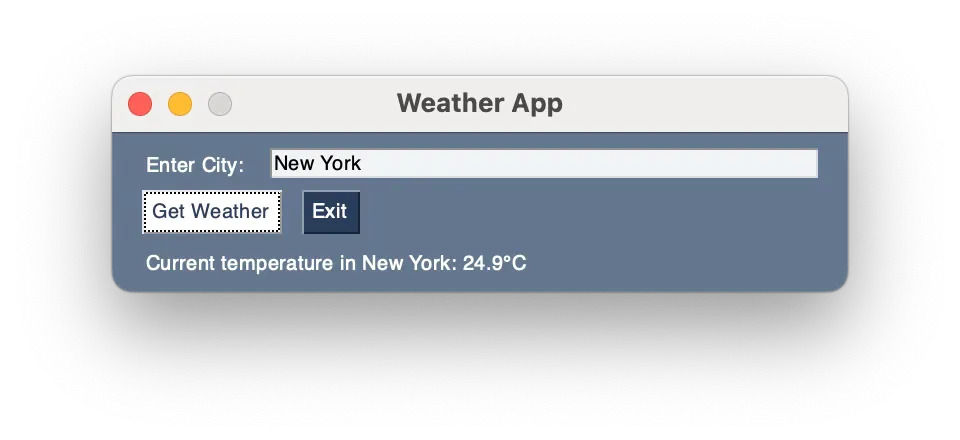

Use a GUI library such as FreeSimpleGUI to build a GUI on top of the original program.

Environment Setup Instructions
Install the required libraries with:
`pip install requests FreeSimpleGUI`

Create a free account and get an API key from https://openweathermap.org

Run the app with python main.py

Resources
Learn how to use the FreeSimpleGUI library:
https://pythonhow.com/how/build-a-gui-with-freesimplegui/


In [5]:
#FreeSimpleGUI test
import FreeSimpleGUI as sg
#Define layout
layout = [
  [sg.Text("Enter your name:")], 
  [sg.InputText(key="name")],
  [sg.Button("Greet Me")],
]
#Create the window
window = sg.Window("Greeting App", layout, size=(600,400))
#Event loop
while True:
  event, values = window.read()
  if event == sg.WIN_CLOSED:
    break
  elif event == "Greet Me":
    name = values["name"]
    print(f"Hello, {name}!")

window.close()


In [8]:
#main program
import os  #access env variables
import dotenv  #to access secret API key values .env file.  .env is in .gitignore as to not share my secret key
import requests  #handles http reuqests
import FreeSimpleGUI as sg #a free, and simple GUI library

dotenv.load_dotenv()  #loads the .env file
apikey = os.getenv('OPENWEATHER')  #gets open weather API key -- register for a key at openweathermap.org
url_geo = "http://api.openweathermap.org/geo/1.0/direct" #url for geo decoding api
url_weather = "https://api.openweathermap.org/data/3.0/onecall"  #url for weather api

#Define window layout
layout = [
  [sg.Text("Enter city:"), sg.InputText(key="location")],
  [sg.Button("Get Weather"), sg.Button("Clear"), sg.Button("Exit")],
  [sg.Text("", key="location_output")],
  [sg.Text("", key="output")]
]

#Create the window
window = sg.Window("Dr. Rawley's Temperature App", layout)

#Event loop
while True:
  event, values = window.read()
  if event == sg.WIN_CLOSED or event == "Exit":
    break
  elif event == "Clear":
    window["location"].update("")
    window["location_output"].update("")
    window["location"].update("")
  elif event == "Get Weather":
    location = values["location"]

    #Geocoding location
    loc_response = requests.get(url_geo, params = {"appid": apikey, "q": location, "limit": "1" })
    loc_response_json = loc_response.json()
    if loc_response_json:
      lat = loc_response_json[0]['lat']
      lon = loc_response_json[0]['lon']
      if "state" in loc_response_json[0]:
        #window["location_output"].update(loc_response_json[0]["name"] + loc_response_json[0]["state"] + loc_response_json[0]["country"] + str(lat) + str(lon))
        window["location_output"].update(f"{loc_response_json[0]["name"]}, {loc_response_json[0]["state"]}, {loc_response_json[0]["country"]} lat:{str(lat)} long:{str(lon)}")
      else:
        window["location_output"].update(f"{loc_response_json[0]["name"]}, {loc_response_json[0]["country"]} lat:{str(lat)} long:{str(lon)}")

      #Grab simple weather API call for that location
      weather_response = requests.get(url_weather, params = {"lat": lat, "lon": lon, "appid": apikey, "exclude": "minutely,hourly,daily,alers", "units": "imperial"})
      if "current" in weather_response.json():
        tempF = weather_response.json()['current']['temp']
        tempC =  (tempF - 32) * 5/9
        window["output"].update("The temperature is: " + "%.1f" % tempF + "F / " + "%.1f" % tempC + "C" )
      else:
        print("Error.")
    
    else:
      window["location_output"].update("Not found. Tip: Try including the country code, like 'USA'.")
  #End get weather event

#End Event Loop

window.close()



